# Natural language processing

## Task 1

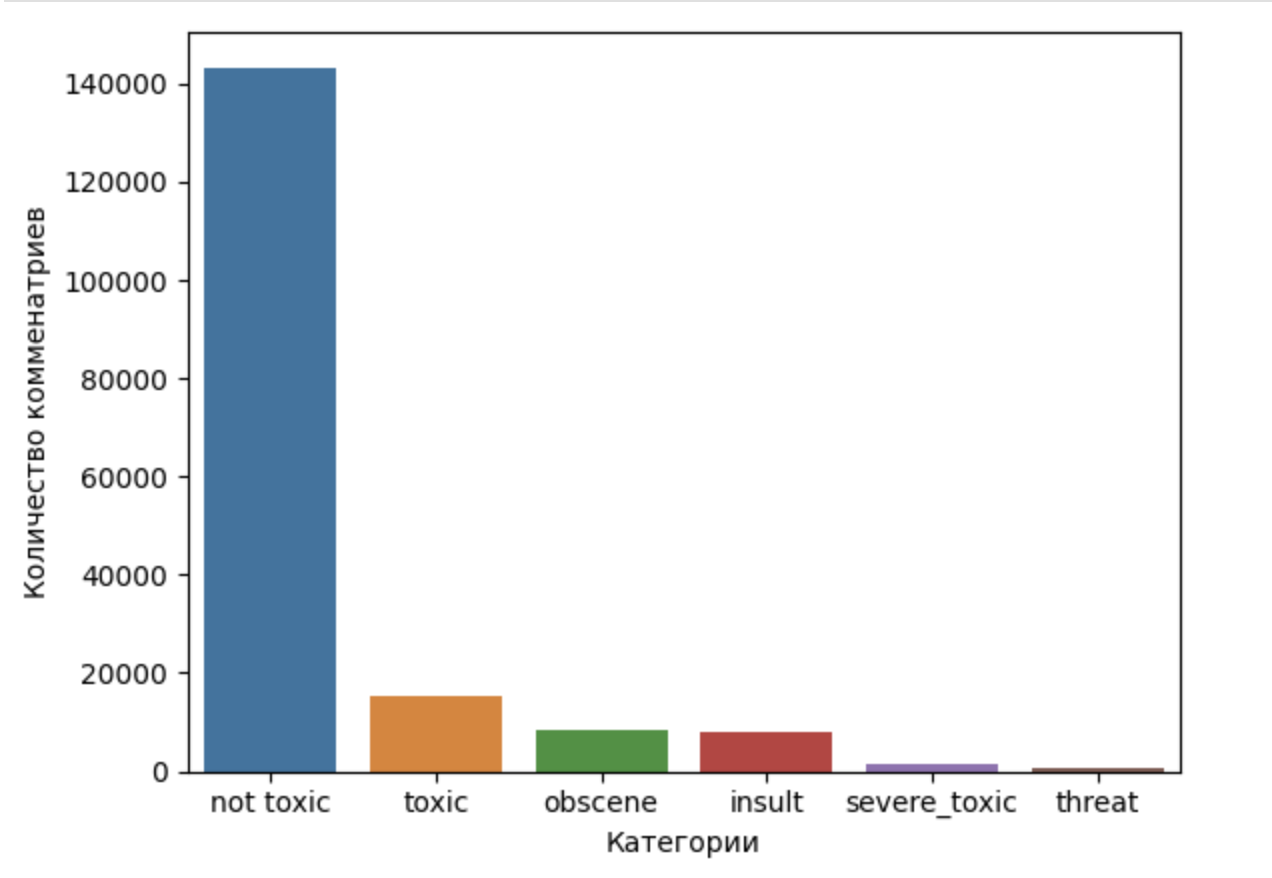Загрузи датасет. Отрисуй Bar-plot с количеством комментариев для каждой категории токсичности 
и комментариев без токсичности.
![sample](../misc/images/bar-plot.png)
Выведи эти количества для каждой категории. 

In [9]:
!pip install seaborn

In [10]:
#выводим DataFrame

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('../datasets/toxic.csv', low_memory=False)
data.drop(0, inplace=True)

#data

In [11]:
#получаем данные по количеству не токсичных отзывов

not_toxic = data[
    (data['toxic']== 0) &
    (data['severe_toxic']== 0) & 
    (data['obscene']== 0) &
    (data['threat']== 0) & 
    (data['insult']== 0)  & 
    (data['identity_hate']== 0) 
    ]
not_toxic
q = len(not_toxic)
data_not_toxic = pd.DataFrame({'Column': ['not_toxic'], 'value': [q]})

#data_not_toxic

In [12]:
#получаем данные по количеству токсичных отзывов

column = data.drop(columns=['comment_text','id'])
column = data.melt(var_name = 'Column', value_vars = column) # Сливаю "широкий" датафрейм в "длинный"
toxic = column[column.value == 1]
toxic = toxic['Column'].value_counts()
data_toxic =pd.DataFrame(toxic)
data_toxic = data_toxic.reset_index()
data_toxic.columns = ['Column', 'value']

#data_toxic

In [13]:
#обединяю токсичные и не токсичные DataFrame

new_data = pd.concat([data_not_toxic, data_toxic])

#new_data

,Column,value
0,not_toxic,143345
0,toxic,15294
1,obscene,8449
2,insult,7877
3,severe_toxic,1595
4,identity_hate,1405
5,threat,478


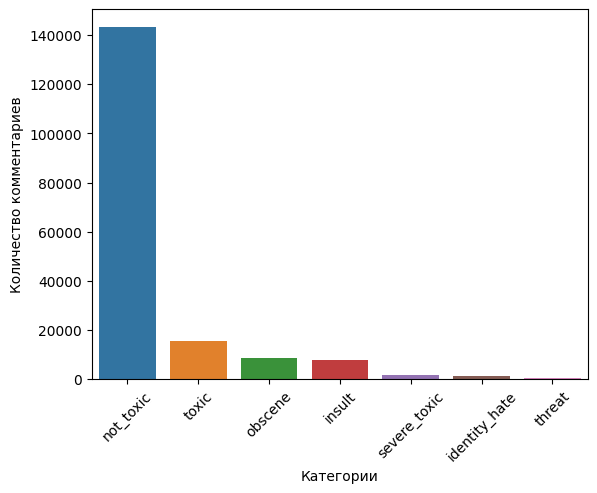

In [14]:
#строим график

sns.barplot(x="Column", y="value", data=new_data)

plt.xlabel('Категории')
plt.ylabel('Количество комментариев')
plt.xticks (rotation= 45 )

new_data

## Task 2

Используя библиотеку [nltk](https://www.nltk.org/) обработайте тексты комментариев: 
* Приведи текст к нижнему регистру и токенизируй
* Оставь токены содержащие английского алфавита 
* Убери знаки препинания, цифры
* Убери стоп-слова из библиотки nltk

Выведи количество токенов для комментария с индексом `000103f0d9cfb60f`

In [15]:
#pip install nltk

In [16]:
import nltk
import re
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

data = pd.read_csv('../datasets/toxic.csv', low_memory=False)
data2 = data[data['id']=='000103f0d9cfb60f' ]
data2 = data2[['id','comment_text']]

data2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evpet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evpet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,comment_text
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...


In [17]:
comment = data2
stop_words = stopwords.words('english')

#создаем список для хранения токенов
tokens =[]
#создаем список для хранения данных без стор-слов
stopwords_cleaned = []


#для каждого сообщения text из столбца comment['comment_text']
for text in comment['comment_text']:
    
    #нижний регистр
    text = text.lower()
    #разбиваем тест на токены с сохранением результата в списке tokens
    text = word_tokenize(text)
    tokens.append(text)
    #с помощью цикла поочередно проверяем каждый токен чтобы это был анг буквы
    text = [word for word in text if word in re.findall("[a-z]+",word)]
    #с помощью цикла поочередно проверяем каждый токен на вхождение в список стоп-слов
    text = [word for word in text if word not in stop_words]
    stopwords_cleaned.append(text)

#сохраняем разбитые на токены сообщения в новой колонке
comment['tokens_text'] = tokens
#записываем данные без стор-слов в новую колонку
comment['noSW_text'] = stopwords_cleaned

for count_token in stopwords_cleaned:
    print(count_token)
    print (len(count_token))

['matches', 'background', 'colour', 'seemingly', 'stuck', 'thanks', 'talk', 'january', 'utc']
9


In [18]:
#долго работает.НО Надо дальше (184 сек)
comment = data
stop_words = stopwords.words('english')

#создаем список для хранения токенов
tokens =[]
#создаем список для хранения данных без стор-слов
stopwords_cleaned = []

short_word = []
upper = []

#для каждого сообщения text из столбца comment['comment_text']
for text in comment['comment_text']:
    
    text = text.lower()
    #разбиваем тест на токены с сохранением результата в списке tokens
    text = word_tokenize(text)
    tokens.append(text)
    #с помощью цикла поочередно проверяем каждый токен чтобы это был анг буквы
    text = [word for word in text if word in re.findall("[a-z]+",word)]
    #с помощью цикла поочередно проверяем каждый токен на вхождение в список стоп-слов
    text = [word for word in text if word not in stop_words]
    stopwords_cleaned.append(text)
    text = [word for word in text if word in re.findall("\D",word)]
    short_word.append(text)


upper = comment['comment_text'].str.isupper()
#сохраняем разбитые на токены сообщения в новой колонке
comment['tokens_text'] = tokens
#записываем данные без стор-слов в новую колонку
comment['noSW_text'] = stopwords_cleaned


## Task 3

In [19]:
Раздели выборку на тренировочную и тестовую с параметрами `random_state=21, test_size=0.3, shuffle=True`
Преобразуй тексты комментариев с помощью [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) с количеством признаков равный 3000. \
Выведи размерность тренировачной выборки после преобразования текста.

SyntaxError: invalid syntax (1688329253.py, line 1)

In [20]:
data = pd.read_csv('../datasets/toxic.csv', low_memory=False)

#проставили тип комментирия not_toxic =0  или toxic = 1
def f(row):
    if row['toxic'] == 0 & row['severe_toxic'] == 0 & row['obscene'] == 0 & row['threat'] == 0 & row['insult'] == 0 & row['identity_hate'] == 0:
        #val = 'not_toxic'
        val = '0'
    else :
        #val = 'toxic'
        val = '1'
    return val
data['com_type'] = data.apply (f, axis=1)

#data

#таблица для работы ( id, noSW_text, com_type)
new_dt =  pd.concat([
    comment[['id','noSW_text']],
    data['com_type']
], axis=1)

#new_dt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize

new_dt['joinTokens'] = [' '.join(token) for token in new_dt['noSW_text']]
X = new_dt['joinTokens']
y = new_dt['com_type']
#y = label_binarize(y, classes=[0, 1])
#обучаем
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.3, shuffle=True)

vectorizer= TfidfVectorizer(max_features=3000)
x_trainTransform = vectorizer.fit_transform(x_train)
x_testTransform = vectorizer.transform(x_test)
print('Размерность тренировачной выборки после преобразования текста', x_trainTransform.shape)

Размерность тренировачной выборки после преобразования текста (111699, 3000)


In [ ]:
#!!!!!2 вариант
data2 = pd.read_csv('../datasets/toxic.csv', low_memory=False)
val=0
#проставили тип комментирия not_toxic =0  или toxic = 1
def f(row):
    if row['toxic'] == 0 & row['severe_toxic'] == 0 & row['obscene'] == 0 & row['threat'] == 0 & row['insult'] == 0 & row['identity_hate'] == 0:
        #val = 'not_toxic'
        val == 1
    else :
        #val = 'toxic'
        val == 0
    return val
data2['not_toxic'] = data2.apply (f, axis=1)

#data2

#таблица для работы ( id, noSW_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic)
new_dt2 =  pd.concat([
    comment[['id','noSW_text']],
    data2[['toxic','severe_toxic','obscene','threat','insult','identity_hate','not_toxic']]
], axis=1)

#new_dt2

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize

new_dt2['joinTokens'] = [' '.join(token) for token in new_dt2['noSW_text']]
XX = new_dt2['joinTokens']
yy = new_dt2.drop(labels=['id','noSW_text','joinTokens'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(XX, yy, random_state=21, test_size=0.3, shuffle=True)

vectorizer2= TfidfVectorizer(max_features=3000)
x_trainTransform2 = vectorizer2.fit_transform(X_train)
X_testTransform2 = vectorizer2.transform(X_test)
print('Размерность тренировачной выборки после преобразования текста', x_trainTransform2.shape)

Размерность тренировачной выборки после преобразования текста (111699, 3000)


## Task 4

Реши задачу [Multi-Label](https://scikit-learn.org/stable/modules/multiclass.html) классификации используя [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier).
Посчитай значение ROC-AUC для тестовой выборки.

In [21]:
#!!!!!2 вариант
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score

model = RidgeClassifier()
model.fit(x_trainTransform2, Y_train)

#X_testTansformed = vectorizer.transform(X_test)# Преобразование текста с помощью TF-IDF

y_pred = model.predict(X_testTransform2)# Предсказание 

# roc_auc_score(Y_test, y_pred)

# print("ROC-AUC:", rocAuc)
# # ROC-AUC: 0.6641234437513172

NameError: name 'x_trainTransform2' is not defined

In [22]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)

from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score

# классификация
model = RidgeClassifier().fit(x_trainTransform, y_train_enc)

#model = RidgeClassifier().fit(x_trainTransform2, y_train)
Y_pred = model.predict(x_testTransform)

#рассчитываем ROC-AUC
roc_auc1 = roc_auc_score(y_test_enc, Y_pred)
print("ROC-AUC:", roc_auc1)


ROC-AUC: 0.7594744210442149


## Task 5

Есть посмотреть на тексты токсичных комментариев, то можно заметить, что они могут повторять одни и те же слова. Или там чаще встречается `!` знаки. \
Кроме 'прямых' текстовых признаков, можно использоваться и эту статистику по тексту. Например, долю уникальных слов в тексте комментария или количество пунктуации в тексте.

Придумай не меньше 4х признаков, которые могут помочь в обучении модели. Добавьте их к признакам TF-IDF и обучите модель. 
Получилось ли увеличить качество классификации?

In [ ]:
#уникальные короткие слова

res_list = [] 
for item in short_word: 
    if item not in res_list: 
        res_list.append(item) 
    
res = ''
for parameters in res_list:
    res += ' ' + ' '.join(parameters)

#список сокращений
q = set(res)

#список Caps
c = sum(bool(x) for x in upper) 


In [ ]:
1. количество восклицательных знаков
2. доля сокращений
3. доля ругательств
4. доля caps_lock

In [ ]:

# количество восклицательных знаков
exclamation_point_train = comment.loc[x_train.index]['comment_text'].apply(lambda x: x.count('!'))
exclamation_point_test = comment.loc[x_test.index]['comment_text'].apply(lambda x: x.count('!'))
                  
# доля сокращений
abbreviation = set(res)
abbreviations_train = comment.loc[x_train.index]['comment_text'].apply(lambda x: 
                                                      len(set(x.lower().split()).intersection(abbreviation)) / 
                                                      len(set(x.lower().split()))) 
abbreviations_test = comment.loc[x_test.index]['comment_text'].apply(lambda x: 
                                                      len(set(x.lower().split()).intersection(abbreviation)) / 
                                                      len(set(x.lower().split())))
# доля ругательств
censored_words = set(['fuck','fac','fucking','hell','shit','ass','asshole','stupid', 'cocksucker', 'piss', 'fool'])
censored_words_train = comment.loc[x_train.index]['comment_text'].apply(lambda x: 
                                                      len(set(x.lower().split()).intersection(censored_words)) / 
                                                      len(set(x.lower().split())))
censored_words_test = comment.loc[x_test.index]['comment_text'].apply(lambda x: 
                                                      len(set(x.lower().split()).intersection(censored_words)) / 
                                                      len(set(x.lower().split())))

# доля caps_lock
caps_lock_train = x_train.apply(lambda x: (len(x.split()))/c)
caps_lock_test = x_test.apply(lambda x: (len(x.split()))/c)

# # доля уникальных слов в комментарии
# unique_words_train = x_train.apply(lambda x: len(set(x.split())) / (len(x.split()) + 1))
# unique_words_test = x_test.apply(lambda x: len(set(x.split())) / (len(x.split()) + 1))

In [ ]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

# объединение новых признаков с с признаками TF-IDF
new_train = csr_matrix(np.array([exclamation_point_train, abbreviations_train, censored_words_train
                                ,caps_lock_train
                                #,unique_words_train
                                ]).T)
new_test = csr_matrix(np.array([exclamation_point_test, abbreviations_test, censored_words_test
                                ,caps_lock_test
                                #,unique_words_test
                               ]).T)
X_train_tfidf_combined = hstack((x_trainTransform, new_train))
X_test_tfidf_combined = hstack((x_testTransform, new_test))

# классификация
model_combined = RidgeClassifier()

model_combined.fit(X_train_tfidf_combined, y_train_enc)
y_pred = model_combined.predict(X_test_tfidf_combined)

# рассчитываем ROC-AUC
roc_auc2 = roc_auc_score(y_test_enc, y_pred)
print("ROC-AUC:", roc_auc2)

print('увеличилось на ', (roc_auc2 - roc_auc1))

ROC-AUC: 0.7598318434362499
увеличилось на  0.0003574223920349562
